# DAT200: Applied Machine Learning

## Compulsory Assignment 1 - Pandas and visualizations

#### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tabulate import tabulate

### Loading and exploring the dataset

---

### 1. Load the dataset named airbnd.csv and store it in a dataframe called raw_df. Use the column named id as the index column fro the dataframe

In [2]:
raw_df = pd.read_csv('assets/airbnb.csv')

In [3]:
raw_df = raw_df.set_index('id')

### 2. Print the first five rows of the dataframe

In [4]:
raw_df.head(5)

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,state,city
id,,,,,,,,,,,,,,,
183319,Panoramic Ocean View Venice Beach,867995,Barbara X,Venice,33.99211,-118.47600,Entire home/apt,152,30,3,2,0,0,CA,Los Angeles
109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Culver City,33.98301,-118.38607,Entire home/apt,115,30,2,1,139,0,CA,Los Angeles
51307,Spanish Bungalow Guest House LA CA. 30 plus ni...,235568,David,Atwater Village,34.12206,-118.26783,Entire home/apt,75,30,138,2,224,0,CA,Los Angeles
184314,Boho Chic Flat..Steps to Beach!,884031,Ashley,Venice,33.97487,-118.46312,Entire home/apt,125,30,30,1,0,0,CA,Los Angeles
51498,Guest House With Its Own Entrance/Exit and Hot...,236758,Bay,Mar Vista,34.00389,-118.44126,Entire home/apt,189,3,378,1,348,41,CA,Los Angeles


### 3. How many unique values exist in each of the columns *state* and *city*?

In [5]:
raw_df.state.unique()

array(['CA', 'CO', 'DC', 'FL', 'HI', 'IL', 'LA', 'MA', 'MN', 'NC', 'NJ',
       'NV', 'NY', 'OH', 'OR', 'RI', 'TN', 'TX', 'WA'], dtype=object)

In [6]:
raw_df.city.unique()

array(['Los Angeles', 'Oakland', 'Pacific Grove', 'San Diego',
       'San Francisco', 'San Mateo County', 'Santa Clara County',
       'Santa Cruz County', 'Denver', 'Washington D.C.', 'Broward',
       'Hawaii', 'Chicago', 'New Orleans', 'Boston', 'Cambridge',
       'Twin Cities MSA', 'Asheville', 'Jersey City', 'Newark',
       'Clark County', 'New York City', 'Columbus', 'Portland', 'Salem',
       'Rhode Island', 'Nashville', 'Austin', 'Dallas', 'Fort Worth',
       'Seattle'], dtype=object)

### 4. Identify missing (NaN) values in each of the columns in the dataset

In [7]:
raw_df.isna().sum()

name                                19
host_id                              0
host_name                         1144
neighbourhood                      712
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
state                                0
city                                 0
dtype: int64

#### 5. Create a copy of *raw_df* named df. Remove any rows containing NaN values in the new dataframe. What is the shape of df before and after removing the NaN values?

In [8]:
df = raw_df
df = df.dropna()
df.isna().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
state                             0
city                              0
dtype: int64

In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325858 entries, 183319 to 51193080
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   name                            325839 non-null  object 
 1   host_id                         325858 non-null  int64  
 2   host_name                       324714 non-null  object 
 3   neighbourhood                   325146 non-null  object 
 4   latitude                        325858 non-null  float64
 5   longitude                       325858 non-null  float64
 6   room_type                       325858 non-null  object 
 7   price                           325858 non-null  int64  
 8   minimum_nights                  325858 non-null  int64  
 9   number_of_reviews               325858 non-null  int64  
 10  calculated_host_listings_count  325858 non-null  int64  
 11  availability_365                325858 non-null  int64  
 12  number_of

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323983 entries, 183319 to 51193080
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   name                            323983 non-null  object 
 1   host_id                         323983 non-null  int64  
 2   host_name                       323983 non-null  object 
 3   neighbourhood                   323983 non-null  object 
 4   latitude                        323983 non-null  float64
 5   longitude                       323983 non-null  float64
 6   room_type                       323983 non-null  object 
 7   price                           323983 non-null  int64  
 8   minimum_nights                  323983 non-null  int64  
 9   number_of_reviews               323983 non-null  int64  
 10  calculated_host_listings_count  323983 non-null  int64  
 11  availability_365                323983 non-null  int64  
 12  number_of

### 6. Which room_type, state and city is the most popular (by number of instances)? Print the name and count of each

In [11]:
most_pop_roomType = df.room_type.value_counts()

##### Creating a table using the tabulate module to get a nicer output

In [12]:
dict = {'Column':[df.columns[6], df.columns[13], df.columns[14]],
       'Most popular':[df.room_type.mode()[0], df.state.mode()[0], df.city.mode()[0]],
       'Count': [df.room_type.value_counts().max(), df.state.value_counts().max(), df.city.value_counts().max()]}

In [13]:
table_result = pd.DataFrame(dict)

In [14]:
print(tabulate(table_result, headers = 'keys', tablefmt = 'presto'))

    | Column    | Most popular    |   Count
----+-----------+-----------------+---------
  0 | room_type | Entire home/apt |  241433
  1 | state     | CA              |  127206
  2 | city      | Los Angeles     |   91600


###  7. What is the average and median price for a listing?

In [15]:
average_listing_price = round(df.loc[:, 'price'].mean(), 2)
print('Average price for a listing:', average_listing_price)

Average price for a listing: 285.13


In [16]:
median_listing_price = round(df.loc[:, 'price'].median(), 2)
print('Median price for a listing:', median_listing_price)

Median price for a listing: 159.0


##  8. What is the average price for the states CA, FL and NY?

In [17]:
state_price = df[['state', 'price']]
states = ['CA', 'FL', 'NY']
state_price = state_price.loc[df['state'].isin(states)]

In [18]:
avg_CA = state_price.loc[state_price['state'] == 'CA']
avg_CA = round(avg_CA['price'].mean(), 2)

avg_FL = state_price.loc[state_price['state'] == 'FL']
avg_FL = round(avg_FL['price'].mean(), 2)

avg_NY = state_price.loc[state_price['state'] == 'NY']
avg_NY = round(avg_NY['price'].mean(), 2)

In [19]:

dict = {'State': ['CA', 'FL', 'NY'],
       'Average price': [avg_CA, avg_FL, avg_NY]}
table_result = pd.DataFrame(dict)

In [20]:
print(tabulate(table_result, headers = 'keys', tablefmt = 'presto'))

    | State   |   Average price
----+---------+-----------------
  0 | CA      |          288.4
  1 | FL      |          241.99
  2 | NY      |          197.22


## 9. Create a new dataframe called df_beach containing all listings with "beach" in the name. Print out the shape of beach_df

In [21]:
# str.contains is not case sensitive, this could be changed by adding case: True 
df_beach = df[df['name'].str.contains('beach')]
df_beach

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,state,city
id,,,,,,,,,,,,,,,
24041,2block from beach-Historic Bungalow discount/m...,39253,Omar & Kristina,Redondo Beach,33.838890,-118.385370,Entire home/apt,185,4,361,2,338,10,CA,Los Angeles
33447,Malibu Guest house/ near beach,144837,Patricia,Malibu,34.014510,-118.806400,Entire home/apt,188,30,332,1,0,0,CA,Los Angeles
278106,Venice Beach Mermaid Cottage+75ft from beach!,1451697,Lisa,Venice,33.979750,-118.464940,Entire home/apt,189,30,52,1,177,0,CA,Los Angeles
162047,4.-Mansion in exclusive beach area of LA,774887,Eric,Rancho Palos Verdes,33.771910,-118.393850,Private room,69,31,131,4,362,4,CA,Los Angeles
287339,Dog Friendly 3BD Home on PRIVATE beach in Malibu,1494781,Tara,Malibu,34.038620,-118.622430,Entire home/apt,1743,2,94,2,246,15,CA,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544923475091135974,Madison Park home near beach shops & downtown...,34779932,Marc,Madison Park,47.636005,-122.280502,Entire home/apt,225,30,0,2,260,0,WA,Seattle
574641002471100387,Original West Seattle beach cottage with amazi...,446538637,Vacasa Washington,Alki,47.584420,-122.399470,Entire home/apt,288,2,40,12,361,12,WA,Seattle
629893356790769569,"New Happy Place Condo in Ballard, 1 mi to beach",133715678,Sneha,Loyal Heights,47.690429,-122.384143,Entire home/apt,148,2,0,1,172,0,WA,Seattle


In [22]:
df_beach_shape = df_beach.shape
print('\nDataFrame Shape :', df_beach_shape)
print('\nNumber of rows :', df_beach_shape[0])
print('\nNumber of columns :', df_beach_shape[1])


DataFrame Shape : (6615, 15)

Number of rows : 6615

Number of columns : 15


# Visualizing the dataset

## 10. Create plot with 2 vertical axes and one horizontal axes. The plot should display a barchart containing the `count` of the `10 most popular` states and cities, each in its own subplot. The bars should be sorted in descending order.

In [57]:
top_states = df.groupby(df['state'])
top_cities = df.groupby(df['city'])

top_states = pd.DataFrame(df.state.value_counts().reset_index().values, columns=['state', 'count'])
top_states = top_states.sort_values(by=['count'], ascending=False)

top_cities = pd.DataFrame(df.city.value_counts().reset_index().values, columns=['city', 'count'])
top_cities = top_cities.sort_values(by=['count'], ascending=False)

In [58]:
top_states.head(10)

,state,count
0,CA,127206
1,NY,39818
2,HI,28446
3,TX,25915
4,FL,16622
5,NV,14369
6,MA,8274
7,TN,7653
8,IL,7414
9,LA,6895


<AxesSubplot:xlabel='state', ylabel='count'>

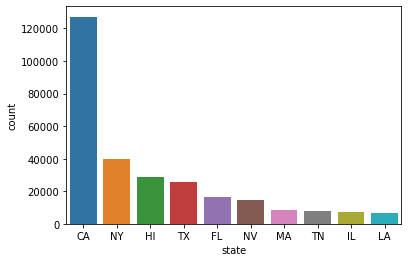

In [59]:
sns.barplot(data=top_states.head(10), x='state', y='count')

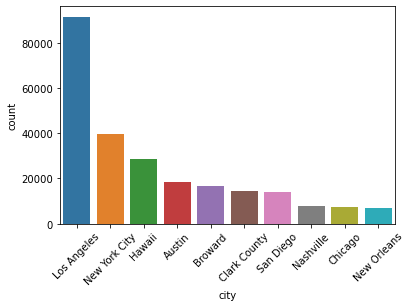

In [69]:
sns.barplot(data=top_cities.head(10), x='city', y='count')
plt.xticks(rotation=45)
plt.show()